In [1]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Question 1

In [2]:
#Load dataset
data = datasets.load_boston()

In [3]:
#Use 2 colums of the data for OLS regression analysis
model = sm.OLS(data.target, data.data[:,:2]).fit()
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.328
Model:                            OLS   Adj. R-squared:                  0.325
Method:                 Least Squares   F-statistic:                     122.9
Date:                Fri, 29 Mar 2019   Prob (F-statistic):           3.28e-44
Time:                        13:39:41   Log-Likelihood:                -2232.5
No. Observations:                 506   AIC:                             4469.
Df Residuals:                     504   BIC:                             4478.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.5777      0.095      6.053      0.0

In [4]:
#Gradient descent algorithm
def gradient_descent(theta,x,y, alpha, no_iter):
    theta = np.squeeze(theta)
    cost_hist = []
    tempX = np.concatenate((np.array([np.ones(len(y))]).transpose(),x), axis=1)

    for i in range(no_iter):
        predictions = np.dot(tempX, theta)
        cost_hist.append((1/(2*len(y)))*sum(pow(np.squeeze(predictions) - y, 2)))
        gradient = np.dot(tempX.transpose(),(np.squeeze(predictions) - y))
        theta = theta - (np.multiply((alpha * (1 / len(y))), gradient))

    return theta, cost_hist

In [5]:
#Initialize hypothesis function coefficients
theta_init = np.zeros(3)
no_iter = 300000
[thetas,cost_hist] = gradient_descent(theta_init,data.data[:,:2],data.target,0.00000017,no_iter)

In [6]:
#Check the coefficients outputted by gradient descent to compare them with OLS
#The results are very close to the ones of OLS
print(thetas)

[0.77357531 0.54567285 0.48239034]


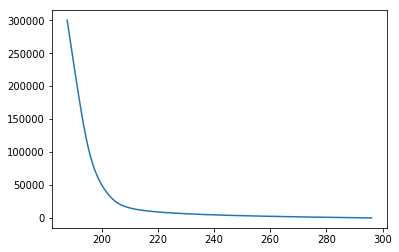

In [8]:
#Demonstrate the evolution of the iterative errors
plt.plot(cost_hist, range(no_iter))

# QUESTION 2

### Note: Left bottom corner of the given volcano is assumed to have (0,0) coordinates

In [9]:
#Load dataset
data = pd.read_csv("homework03.volcano.csv", header=None)

#Create feaure and label vectors
x1 = []
x2 = []
Y = []
for i in range(61):
    for j in range(87):
        x2.append(i)
        x1.append(j)
        Y.append(data[j][60 - i])
X = np.column_stack((x1, x2))

In [10]:
#Initialize regression coefficients
theta_init = np.zeros(3)

#Start from the point [87,1]
max_cord = [86,0]
max_cord_hist = [[86,0]]
max_value_hist = [94]

#Set the point [87,1] as our ground by subtracting its height (94) from all points
Y = list(map(lambda x: x - 94, Y))

#Apply regression iteratively to climb the mountain
for i in range(15):
    X_aug = sm.add_constant(X)
    #Apply regression
    #Below statement is the gradient descent algorithm I wrote but for performance reasons I commented it out and used OLS
    #[thetas,cost_hist] = gradient_descent(theta_init, X_aug, Y,0.00000017,30000)
    result = sm.OLS(Y, X_aug).fit()
    thetas = result.params
    
    #Find the highest intersection of our prediction plane and the mountain
    predictions = np.matmul(X_aug,thetas)

    pred_mat = predictions.reshape((61,87))
    Y_mat = np.array(Y).reshape((61,87))

    diff_mat = np.subtract(Y_mat, pred_mat)

    max_point = -1000
    for i in (range(diff_mat.shape[0])):
        for j in (range(diff_mat.shape[1])):
            if diff_mat[i][j] >= 0 and max_point < pred_mat[i][j]:
                max_point = Y_mat[i][j]
                max_cord = [i,j]

    #Subtract the height of the hisghest intersection point from the heights of all points on the mountain
    #to start from that point in the next iteration
    trunc_mat = np.subtract(Y_mat,max_point)
    max_cord_hist.append(max_cord)
    max_value_hist.append(max_point)
    
    for i in (range(diff_mat.shape[0])):
        for j in (range(diff_mat.shape[1])):
            if trunc_mat[i][j] < 0:
                trunc_mat[i][j] = 0
                
    Y_after = []
    for i in range(61):
        for j in range(87):
            Y_after.append(trunc_mat[i][j])
    #Update our mountain
    Y = Y_after

In [11]:
#Print the last location & its altitude
print(max_cord)
print(data[max_cord[1]][60 - max_cord[0]])

[20, 19]
188


In [12]:
#Print the climbing trajectory 
print(max_cord_hist)

[[86, 0], [26, 7], [21, 11], [17, 16], [11, 26], [23, 13], [14, 22], [13, 24], [13, 26], [13, 27], [14, 25], [15, 26], [17, 21], [18, 21], [19, 20], [20, 19]]


In [13]:
#Print the climbing steps at each iteration
print(max_value_hist)

[94, 51, 12, 8, 4, 5, 2, 1, 1, 1, 1, 1, 3, 1, 1, 2]


In [14]:
#Sum the climbing steps to see if they add up to the highest point reached
sum(max_value_hist)

188